In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.datasets
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t



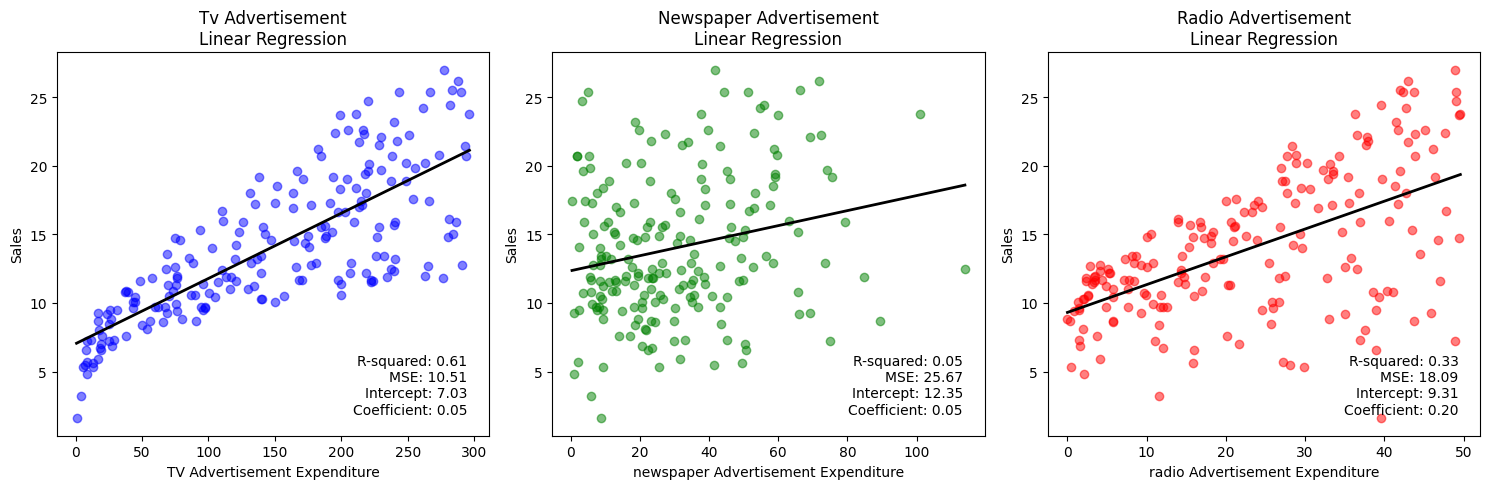

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['blue', 'green', 'red']

# Iterate over each feature and plot the scatter plot with the regression line
for i, feature in enumerate(['TV', 'newspaper', 'radio']):
    # Scatter plot
    axes[i].scatter(df[feature], df['sales'], color=colors[i], alpha=0.5)
    axes[i].set_xlabel(feature + ' Advertisement Expenditure')
    axes[i].set_ylabel('Sales')
    
    # Linear regression
    model = linear_model.LinearRegression()
    x = df[feature].values.reshape(-1, 1)
    y = df['sales'].values
    model.fit(x, y)
    
    # Plot regression line
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    axes[i].plot(x_range, y_pred, color='black', linewidth=2)  # Changed regression line color to black
    
    # Calculate R-squared and MSE
    y_pred_all = model.predict(x)
    r2 = r2_score(y, y_pred_all)
    mse = mean_squared_error(y, y_pred_all)
    
    # Display R-squared and MSE, intercept, and coefficients
    axes[i].text(0.95, 0.05, f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nIntercept: {model.intercept_:.2f}\nCoefficient: {model.coef_[0]:.2f}', 
                 transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')  # Adjusted text position
    
    # Title
    axes[i].set_title(feature.capitalize() + ' Advertisement\nLinear Regression')  # Capitalized feature names

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

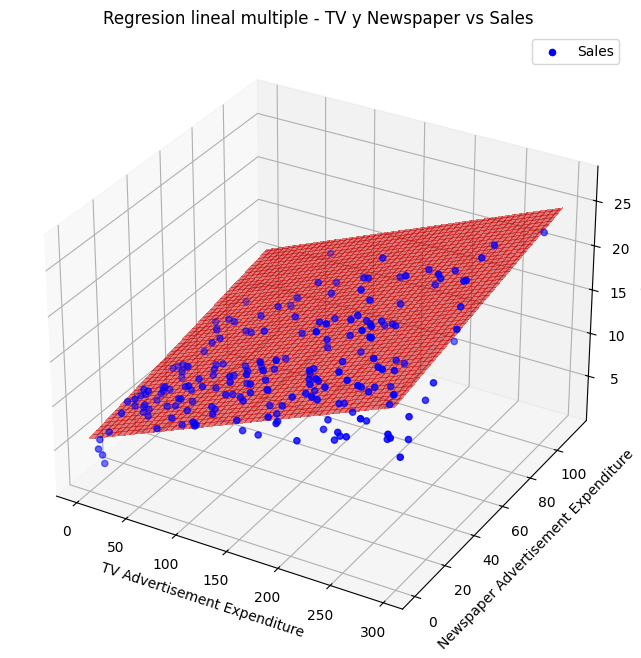

In [21]:
# Load the dataset
df = pd.read_csv('Advertising.csv')

# Extract predictor variables (TV advertisement and newspaper advertisement) and response variable (sales)
X = df[['TV', 'newspaper']].values
y = df['sales'].values

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get model predictions
y_pred = model.predict(X)

# Create meshgrid for 3D plot
x_tv, x_newspaper = np.meshgrid(np.linspace(df['TV'].min(), df['TV'].max(), 100),
                                 np.linspace(df['newspaper'].min(), df['newspaper'].max(), 100))
X_plane = np.column_stack((x_tv.ravel(), x_newspaper.ravel()))
y_plane = model.predict(X_plane)
y_plane = y_plane.reshape(x_tv.shape)

# Plot 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TV'], df['newspaper'], df['sales'], color='blue', label='Sales')

# Plot fitted plane
ax.plot_surface(x_tv, x_newspaper, y_plane, alpha=0.5, color='red', linewidth=0, antialiased=False)

ax.set_xlabel('TV Advertisement Expenditure')
ax.set_ylabel('Newspaper Advertisement Expenditure')
ax.set_zlabel('Sales')
ax.set_title('Regresion lineal multiple - TV y Newspaper vs Sales')
plt.legend()
plt.show()

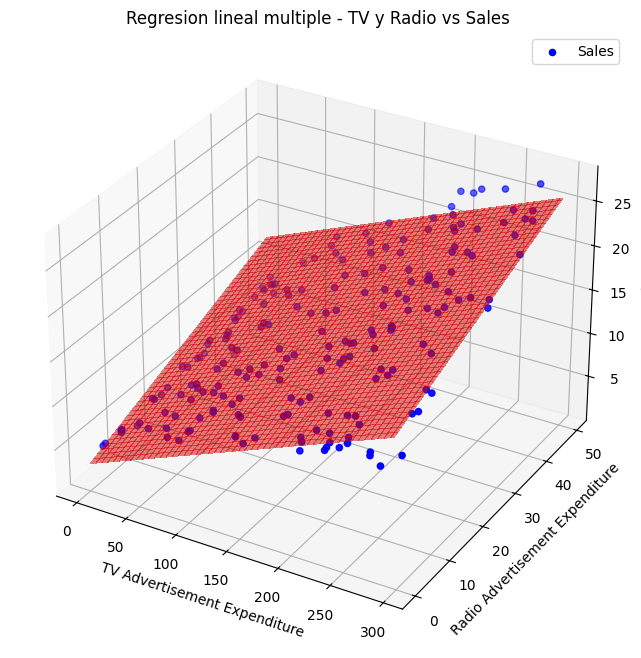

In [22]:
# Load the dataset
df = pd.read_csv('Advertising.csv')

# Extract predictor variables (TV advertisement and newspaper advertisement) and response variable (sales)
X = df[['TV', 'radio']].values
y = df['sales'].values

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get model predictions
y_pred = model.predict(X)

# Create meshgrid for 3D plot
x_tv, x_radio = np.meshgrid(np.linspace(df['TV'].min(), df['TV'].max(), 100),
                                 np.linspace(df['radio'].min(), df['radio'].max(), 100))
X_plane = np.column_stack((x_tv.ravel(), x_radio.ravel()))
y_plane = model.predict(X_plane)
y_plane = y_plane.reshape(x_tv.shape)

# Plot 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TV'], df['radio'], df['sales'], color='blue', label='Sales')

# Plot fitted plane
ax.plot_surface(x_tv, x_radio, y_plane, alpha=0.5, color='red', linewidth=0, antialiased=False)

ax.set_xlabel('TV Advertisement Expenditure')
ax.set_ylabel('Radio Advertisement Expenditure')
ax.set_zlabel('Sales')
ax.set_title('Regresion lineal multiple - TV y Radio vs Sales')
plt.legend()
plt.show()

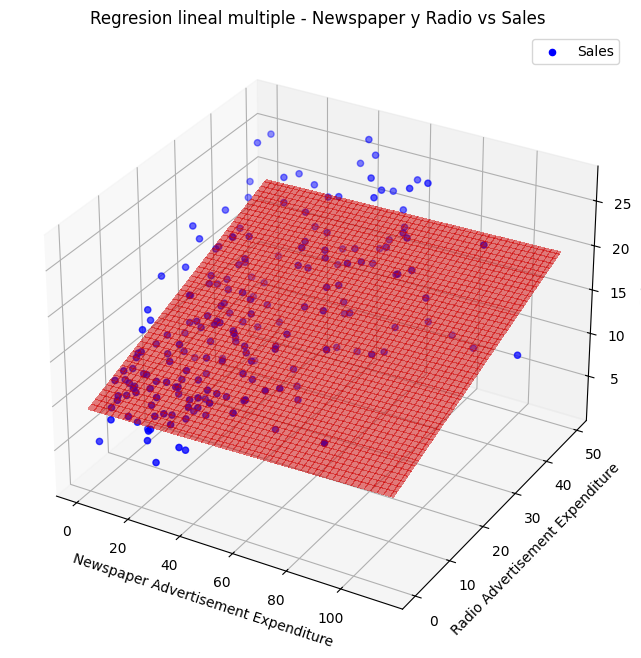

In [30]:
# Load the dataset
df = pd.read_csv('Advertising.csv')

# Extract predictor variables (TV advertisement and newspaper advertisement) and response variable (sales)
X = df[['newspaper', 'radio']].values
y = df['sales'].values

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get model predictions
y_pred = model.predict(X)

# Create meshgrid for 3D plot
x_newspaper, x_radio = np.meshgrid(np.linspace(df['newspaper'].min(), df['newspaper'].max(), 100),
                                 np.linspace(df['radio'].min(), df['radio'].max(), 100))
X_plane = np.column_stack((x_newspaper.ravel(), x_radio.ravel()))
y_plane = model.predict(X_plane)
y_plane = y_plane.reshape(x_newspaper.shape)

# Plot 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['newspaper'], df['radio'], df['sales'], color='blue', label='Sales')

# Plot fitted plane
ax.plot_surface(x_newspaper, x_radio, y_plane, alpha=0.5, color='red', linewidth=0, antialiased=False)

ax.set_xlabel('Newspaper Advertisement Expenditure')
ax.set_ylabel('Radio Advertisement Expenditure')
ax.set_zlabel('Sales')
ax.set_title('Regresion lineal multiple - Newspaper y Radio vs Sales')
plt.legend()
plt.show()

In [23]:
# Extract TV Advertisement expenditure and Sales from the dataset
X = df[['TV','newspaper','radio']]  # Predictor variable (TV Advertisement)
y = df['sales']  # Response variable (Sales)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the regression results
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        21:30:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Vemos que la variable "Newspaper" pasa a ser no relevante individualmente. Veamos qué pasa sacandola del modelo:

In [24]:
# Extract TV Advertisement expenditure and Sales from the dataset
X = df[['TV','radio']]  # Predictor variable (TV Advertisement)
y = df['sales']  # Response variable (Sales)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the regression results
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.83e-98
Time:                        21:35:28   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

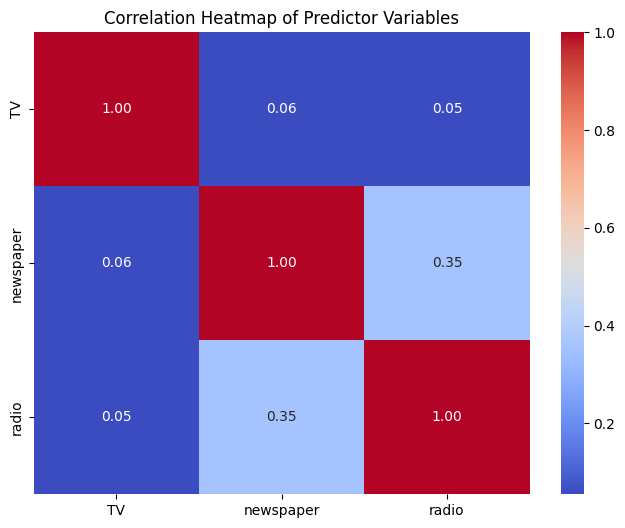

In [28]:
# Extract predictor variables (X)
X = df[['TV', 'newspaper', 'radio']]

# Compute correlation matrix
corr_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

In [34]:
print('Fiteamos un modelo lineal simple con pendientes iguales a :{}'.format(model.coef_))
print()
print('Su ordenada al origen es igual a: {}'.format(model.intercept_))

Fiteamos un modelo lineal simple con pendientes iguales a :[0.00664417 0.19904459]

Su ordenada al origen es igual a: 9.188920459196563
